# 1. Text Reading and Preprocessing
#### Load user-provided text or Wikipedia or sample.txt file
#### Convert to lowercase.
#### Remove all non-alphabetical characters and punctuation.
#### Remove words with variable length and stopwords
#### Print the cleaned text.
#### Sentence Tokenization.
#### Word Tokenization.
#### Print the list of sentences and word tokens

In [2]:
import wikipedia

text = wikipedia.summary('Movies')
text

'A film, also known as a movie or motion picture, is a work of visual art that simulates experiences and otherwise communicates ideas, stories, perceptions, emotions, or atmosphere through the use of moving images that are generally, since the 1930s, synchronized with sound and some times using other sensory stimulations.\nFilms are produced by recording actual people and objects with cameras or by creating them using animation techniques and special effects. They comprise a series of individual frames, but when these images are shown rapidly in succession, the illusion of motion is given to the viewer. Flickering between frames is not seen due to an effect known as persistence of vision, whereby the eye retains a visual image for a fraction of a second after the source has been removed. Also of relevance is what causes the perception of motion; a psychological effect identified as beta movement.\nFilms are considered by many to be an important art form; films entertain, educate, enlig

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

#nltk.download('punkt')
#nltk.download('punkt_tab')
#nltk.download('stopwords')

text = text.lower()
text = re.sub(r'[^a-z\s]','',text)
stop_words = set(stopwords.words('english'))

tokens = word_tokenize(text)
tokens = [token for token in tokens if token not in stop_words]
sentences = sent_tokenize(text)
print("Tokens:",tokens)
print("Sentences:",sentences)

Tokens: ['film', 'also', 'known', 'movie', 'motion', 'picture', 'work', 'visual', 'art', 'simulates', 'experiences', 'otherwise', 'communicates', 'ideas', 'stories', 'perceptions', 'emotions', 'atmosphere', 'use', 'moving', 'images', 'generally', 'since', 'synchronized', 'sound', 'times', 'using', 'sensory', 'stimulations', 'films', 'produced', 'recording', 'actual', 'people', 'objects', 'cameras', 'creating', 'using', 'animation', 'techniques', 'special', 'effects', 'comprise', 'series', 'individual', 'frames', 'images', 'shown', 'rapidly', 'succession', 'illusion', 'motion', 'given', 'viewer', 'flickering', 'frames', 'seen', 'due', 'effect', 'known', 'persistence', 'vision', 'whereby', 'eye', 'retains', 'visual', 'image', 'fraction', 'second', 'source', 'removed', 'also', 'relevance', 'causes', 'perception', 'motion', 'psychological', 'effect', 'identified', 'beta', 'movement', 'films', 'considered', 'many', 'important', 'art', 'form', 'films', 'entertain', 'educate', 'enlighten', 'i

# 2. Text normalization and extract Tags or Entities
#### Apply Porter Stemmer on tokens.
#### Apply WordNet Lemmatizer on tokens.
#### Apply spaCy Lemmatizer on tokens.
#### Print the result of token after normalization
#### Assign and print POS tags to tokens (at least 20).
#### Extract named entities using spaCy.
#### Print entities and their labels
#### Render the visualization of dependencies of POS

In [4]:
import spacy
from spacy import displacy
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

#nltk.download('wordnet')

nlp = spacy.load('en_core_web_sm')
doc = nlp(text)

ps = PorterStemmer()
stemmed = [ps.stem(token) for token in tokens]
print("Stemmed:",stemmed)

lemmatizer = WordNetLemmatizer()
lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmatized:",lemmatized)

pos = [(token.text, token.pos_, token.tag_) for token in doc]
print("POS:",pos)

ner = [(ent.text,ent.label_) for ent in doc.ents]
print("NER:",ner)

displacy.render(doc,style='ent',jupyter=True)
displacy.render(doc,style='dep',jupyter=True)

Stemmed: ['film', 'also', 'known', 'movi', 'motion', 'pictur', 'work', 'visual', 'art', 'simul', 'experi', 'otherwis', 'commun', 'idea', 'stori', 'percept', 'emot', 'atmospher', 'use', 'move', 'imag', 'gener', 'sinc', 'synchron', 'sound', 'time', 'use', 'sensori', 'stimul', 'film', 'produc', 'record', 'actual', 'peopl', 'object', 'camera', 'creat', 'use', 'anim', 'techniqu', 'special', 'effect', 'compris', 'seri', 'individu', 'frame', 'imag', 'shown', 'rapidli', 'success', 'illus', 'motion', 'given', 'viewer', 'flicker', 'frame', 'seen', 'due', 'effect', 'known', 'persist', 'vision', 'wherebi', 'eye', 'retain', 'visual', 'imag', 'fraction', 'second', 'sourc', 'remov', 'also', 'relev', 'caus', 'percept', 'motion', 'psycholog', 'effect', 'identifi', 'beta', 'movement', 'film', 'consid', 'mani', 'import', 'art', 'form', 'film', 'entertain', 'educ', 'enlighten', 'inspir', 'audienc', 'visual', 'element', 'cinema', 'need', 'translat', 'give', 'motion', 'pictur', 'univers', 'power', 'commun',

# 3. Vectorization and Visualization

##### Apply CBOW count vectorization on the text.
#### Apply TF-IDF vectorization.
#### Print vocabulary and vectorized output.
#### Create a bar chart for top TF-IDF words.
#### Generate a Word Cloud for most frequent words.

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cleaned_text = " ".join(tokens)

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform([cleaned_text])

print("Count Vectorization Vocabulary")
print(count_vectorizer.vocabulary_)
print("Count Vectorized Output")
print(count_matrix.toarray())

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([cleaned_text])

print("TF-IDF Vocabulary")
print(tfidf_vectorizer.vocabulary_)
print("TF-IDF Vectorized Output")
print(tfidf_matrix.toarray())

Count Vectorization Vocabulary
{'film': 35, 'also': 3, 'known': 52, 'movie': 56, 'motion': 54, 'picture': 65, 'work': 103, 'visual': 101, 'art': 5, 'simulates': 80, 'experiences': 33, 'otherwise': 60, 'communicates': 15, 'ideas': 44, 'stories': 87, 'perceptions': 63, 'emotions': 29, 'atmosphere': 7, 'use': 97, 'moving': 57, 'images': 48, 'generally': 41, 'since': 81, 'synchronized': 90, 'sound': 82, 'times': 92, 'using': 98, 'sensory': 77, 'stimulations': 86, 'films': 36, 'produced': 67, 'recording': 70, 'actual': 0, 'people': 61, 'objects': 59, 'cameras': 12, 'creating': 20, 'animation': 4, 'techniques': 91, 'special': 84, 'effects': 27, 'comprise': 17, 'series': 78, 'individual': 50, 'frames': 40, 'shown': 79, 'rapidly': 69, 'succession': 89, 'illusion': 46, 'given': 42, 'viewer': 99, 'flickering': 37, 'seen': 76, 'due': 24, 'effect': 26, 'persistence': 64, 'vision': 100, 'whereby': 102, 'eye': 34, 'retains': 74, 'image': 47, 'fraction': 39, 'second': 75, 'source': 83, 'removed': 73,

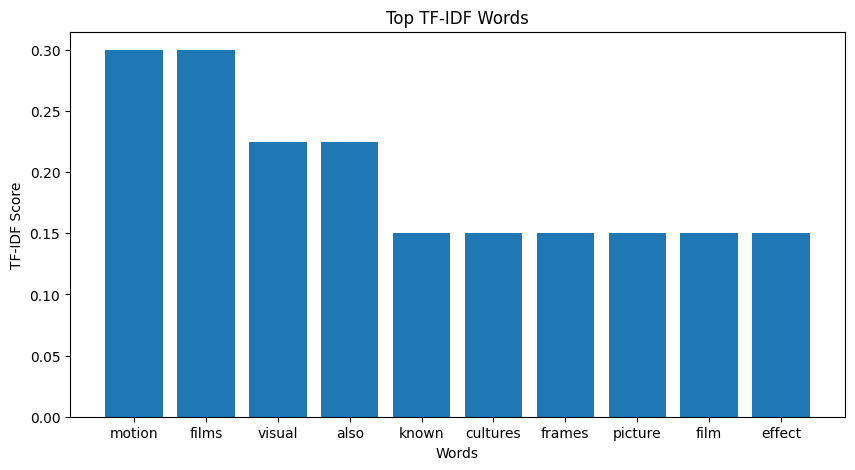

In [6]:
import numpy as np
tfidf_scores = tfidf_matrix.toarray()[0]
vocab = tfidf_vectorizer.get_feature_names_out()

sorted_indices = np.argsort(tfidf_scores)[::-1][:10]
top_words = vocab[sorted_indices]
top_scores = tfidf_scores[sorted_indices]

plt.figure(figsize=(10,5))
plt.bar(top_words, top_scores)
plt.title("Top TF-IDF Words")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.show()

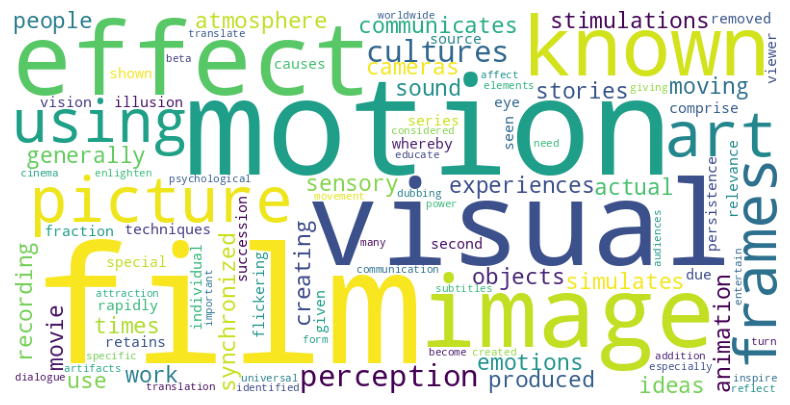

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 4. Word Embeddings and Visualization
#### Train Word2Vec embeddings (CBOW).
#### Load GloVe embeddings (100d)
#### Retrieve vector for first word.
#### Train FastText embeddings on the text.
#### Print vectors and most similar words for a selected word.
#### Perform PCA on word embeddings and visualize in 2D.

In [11]:
from gensim.models import Word2Vec, FastText, KeyedVectors
from sklearn.decomposition import PCA

sentences = [tokens]

w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)  # sg=0 → CBOW
print("Word2Vec Embedding for 'film' ")
print(w2v_model.wv['film'])
print("Most similar to 'film':")
print(w2v_model.wv.most_similar('film', topn=5))

# glove_path = "glove.6B.100d.txt"
# glove_model = {}
# with open(glove_path, encoding="utf8") as f:
#     for line in f:
#         values = line.split()
#         word = values[0]
#         vector = np.asarray(values[1:], dtype='float32')
#         glove_model[word] = vector
# print("GloVe Embedding for 'people'")
# print(glove_model.get("people"))

fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1)
print("FastText Embedding for 'film' ")
print(fasttext_model.wv['film'])
print("Most similar to 'film':")
print(fasttext_model.wv.most_similar('film', topn=5))



Word2Vec Embedding for 'film' 
[-0.00715024  0.0012542  -0.00716528 -0.00225739  0.00374354  0.00578978
  0.00120433  0.00214174 -0.00409601  0.00720812 -0.00631365  0.00462912
 -0.00821286  0.00203585 -0.00494754 -0.0042627  -0.00309837  0.00563307
  0.00578033 -0.00500879  0.00077836 -0.00848057  0.00780723  0.00926389
 -0.00276104  0.00081572  0.00073531  0.0054869  -0.00862847  0.00057372
  0.00687725  0.00223528  0.00114225 -0.00933393  0.0084748  -0.00623588
 -0.00297088  0.0034728  -0.00077717  0.00139767  0.00179137 -0.006841
 -0.00971767  0.00901863  0.0062159  -0.00691038  0.00337818  0.00021128
  0.00477505 -0.00711805  0.00402687  0.00433844  0.00996554 -0.00448447
 -0.00139677 -0.00730277 -0.00967969 -0.00905894 -0.00103783 -0.0064986
  0.00485247 -0.0061504   0.00253152  0.00073895 -0.00340056 -0.00095952
  0.00999044  0.00915196 -0.00447212  0.00910566 -0.00563628  0.00593137
 -0.00309742  0.00345302  0.00305715  0.00690473 -0.00236782  0.00878145
  0.00758949 -0.0095553

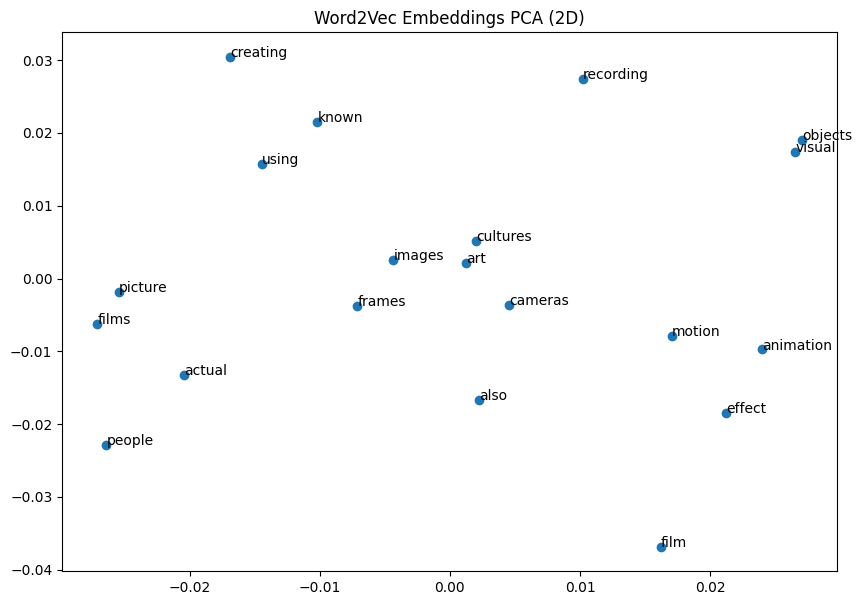

In [12]:
words = list(w2v_model.wv.key_to_index.keys())[:20]
X = np.array([w2v_model.wv[w] for w in words])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.title("Word2Vec Embeddings PCA (2D)")
plt.show()

# 5. Similarity Measures and Calculating time of execution
#### Compute cosine similarity between selected word pairs using embeddings.
#### Compute Jaccard similarity between first two sentences.
#### Euclidean distance scores
#### Print similarity scores
#### Print the time of total execution

In [16]:
text = """
A film, also called a movie or motion picture, is a work of visual art that tells a story or conveys ideas through moving images.
Films are produced either by recording real-world events with cameras or by creating animations.
They consist of a sequence of frames shown rapidly to create the illusion of motion.
The perception of motion is influenced by a psychological effect called persistence of vision.
Movies are widely regarded as both an entertaining and educational medium, often reflecting culture and society.
"""

import time
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

start_time = time.time()

#text = text.replace("\n"," ")
sentences = [word_tokenize(s) for s in sent_tokenize(text)]
print(sentences)
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

word1, word2 = "vision", "movie"
if word1 in w2v_model.wv and word2 in w2v_model.wv:
    vec1, vec2 = w2v_model.wv[word1].reshape(1, -1), w2v_model.wv[word2].reshape(1, -1)
    cos_sim = cosine_similarity(vec1, vec2)[0][0]
else:
    cos_sim = "One of the words not in vocabulary"

s1, s2 = set(sentences[0]), set(sentences[1])
jaccard_sim = len(s1.intersection(s2)) / len(s1.union(s2))

if word1 in w2v_model.wv and word2 in w2v_model.wv:
    euc_dist = euclidean_distances(vec1, vec2)[0][0]
else:
    euc_dist = "One of the words not in vocabulary"

end_time = time.time()
execution_time = end_time - start_time

print(f"Cosine Similarity ({word1}, {word2}): {cos_sim}")
print(f"Jaccard Similarity (Sentence 1 vs Sentence 2): {jaccard_sim}")
print(f"Euclidean Distance ({word1}, {word2}): {euc_dist}")
print(f"Total Execution Time: {execution_time:.4f} seconds")


[['A', 'film', ',', 'also', 'called', 'a', 'movie', 'or', 'motion', 'picture', ',', 'is', 'a', 'work', 'of', 'visual', 'art', 'that', 'tells', 'a', 'story', 'or', 'conveys', 'ideas', 'through', 'moving', 'images', '.'], ['Films', 'are', 'produced', 'either', 'by', 'recording', 'real-world', 'events', 'with', 'cameras', 'or', 'by', 'creating', 'animations', '.'], ['They', 'consist', 'of', 'a', 'sequence', 'of', 'frames', 'shown', 'rapidly', 'to', 'create', 'the', 'illusion', 'of', 'motion', '.'], ['The', 'perception', 'of', 'motion', 'is', 'influenced', 'by', 'a', 'psychological', 'effect', 'called', 'persistence', 'of', 'vision', '.'], ['Movies', 'are', 'widely', 'regarded', 'as', 'both', 'an', 'entertaining', 'and', 'educational', 'medium', ',', 'often', 'reflecting', 'culture', 'and', 'society', '.']]
Cosine Similarity (vision, movie): 0.037053439766168594
Jaccard Similarity (Sentence 1 vs Sentence 2): 0.05555555555555555
Euclidean Distance (vision, movie): 0.0795588493347168
Total E